# Loan Approval Prediction

# Problem

The bank sells different products to its clients and loans are seemingly the most profitable. The bank has however noted an increase in the number of defaulted loans and has tasked us to develop a machine learning based model to assist in the decision making of whether to allocate a loan to an applicant or not.

The bank has granted us access to a database of data that has different fields (predictors); they are however not sure if the parameters provided can be used to predict the probability of defaulting. The bank has provided us with data which looks as follows:

In [115]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
# Using 5-Fold Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

#other
#from scipy import stats

#import polars as pl

import matplotlib.pyplot as plot
import seaborn as snb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#with_ignore_parser_errors=true

# Loading the dataset.

In [116]:
# Loading data set
# data is data set variable
data = pd.read_csv('DataSet/Data Group 1.csv')

# Understanding the various features (columns) of the dataset.

In [117]:
# print the names of the 13 features
print("Features: ", data.columns)

Features:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [118]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [119]:
# show the shape of the dataset i.e. no of rows, no of columns
data.shape

(513, 13)

In [120]:
# show the data types for each column of the train set
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [121]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


# Understanding the various features (columns) of the dataset.

In [122]:
# Summary of numerical variables for training data set

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,470.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,83.200278,63.375911,0.360556
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,127.000000,360.000000,1.000000
75%,5746.000000,2283.000000,163.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


# Descriptive analysis

# Understanding Distribution of Categorical Variables

In [8]:
# Univariate Descriptive analysis
# Target Variable (Categorical)

In [9]:
# frequency table of a variable will give us the count of each category in that variable
data['Loan_Status'].value_counts()

Y    355
N    158
Name: Loan_Status, dtype: int64

In [10]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
data['Loan_Status'].value_counts(normalize=True)

Y    0.692008
N    0.307992
Name: Loan_Status, dtype: float64

<AxesSubplot:>

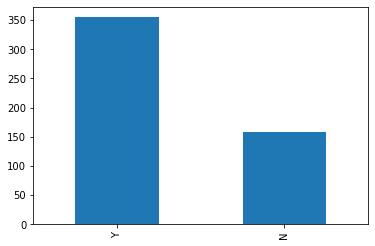

In [11]:
# bar plot to visualize the frequency
data['Loan_Status'].value_counts().plot.bar()

In [12]:
# Independent Variable (Categorical)

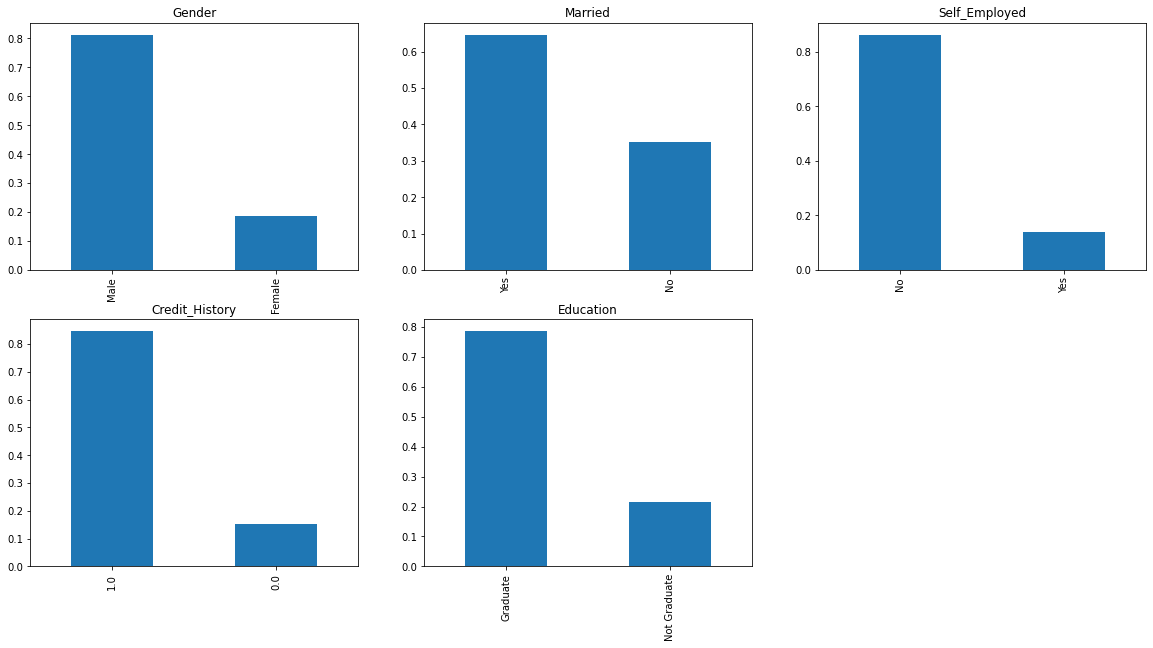

In [13]:
# Visualizing categorical features
# plot.figure(1)
plot.subplot(231)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plot.subplot(232)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plot.subplot(233)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plot.subplot(234)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plot.subplot(235)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plot.show()

In [14]:
# Independent Variable (Ordinal)

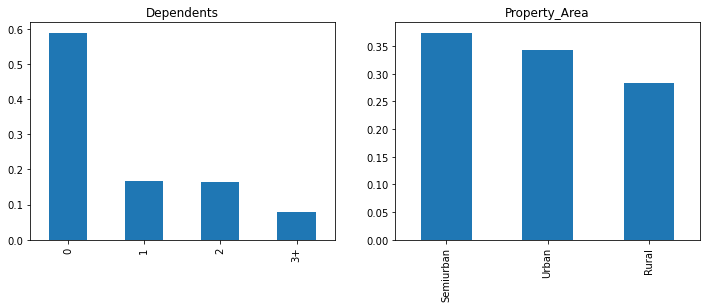

In [15]:
# Visualizing remaining categorical features
# plt.figure(1)
plot.subplot(121)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plot.subplot(122)
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plot.show()

In [16]:
# Independent Variable (Numerical)

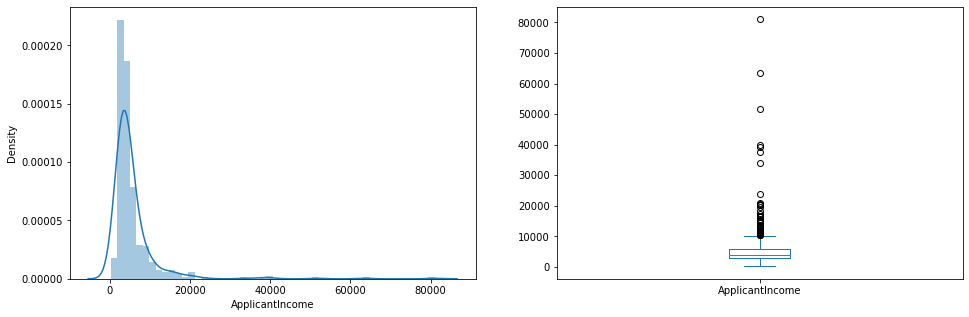

In [17]:
# Visualizing ApplicantIncome
# plt.figure(1)
plot.subplot(121)
snb.distplot(data['ApplicantIncome']);

plot.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))

plot.show()

Text(0.5, 0.98, '')

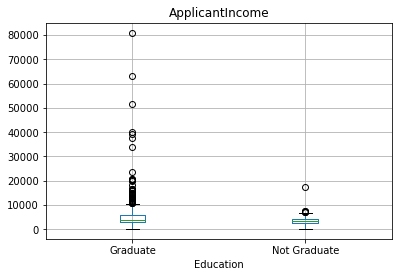

In [18]:
#It can be inferred that most of the data in the distribution of applicant income is towards left which
#means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to 
#make it normal in later sections as algorithms works better if the data is normally distributed.
#The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income 
#disparity in the society. Part of this can be driven by the fact that we are looking at people with different 
#education levels. Let us segregate them by Education:

data.boxplot(column='ApplicantIncome', by = 'Education')
plot.suptitle("")

In [19]:
#Coapplicant income distribution.

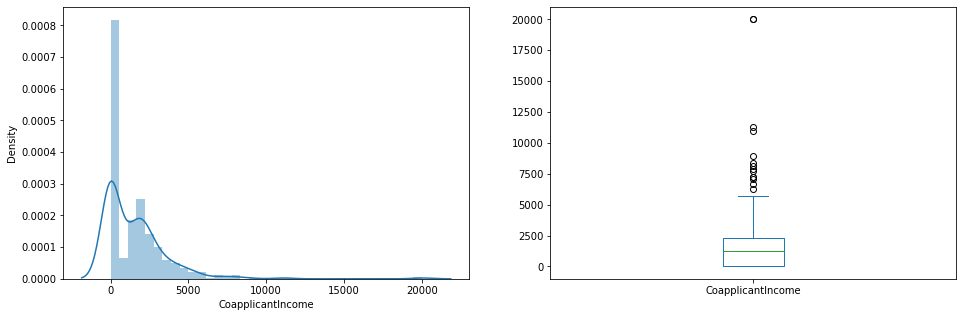

In [20]:
# plt.figure(1)
plot.subplot(121)
snb.distplot(data['CoapplicantIncome']);

plot.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))

plot.show()

In [21]:
#distribution of LoanAmount variable.

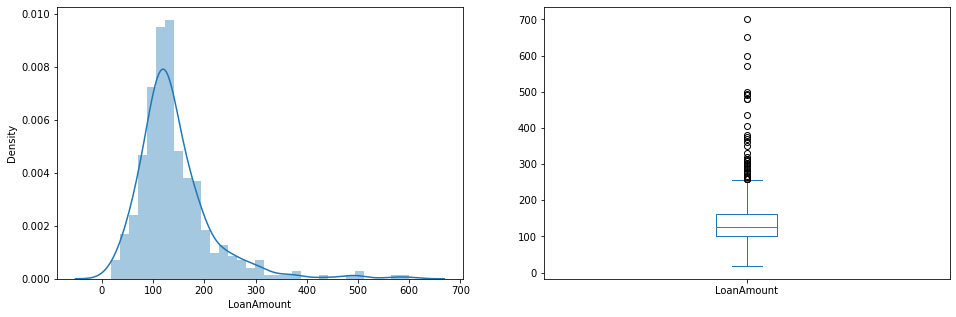

In [22]:
# plt.figure(1)
plot.subplot(121)
df=data.dropna()
snb.distplot(df['LoanAmount']);

plot.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))

plot.show()

In [23]:
#Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar
#plots which will calculate the number 
#of each category.

# frequency table of a variable will give us the count of each category in that variable
data['Loan_Amount_Term'].value_counts()

360.0    426
180.0     35
300.0     13
480.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

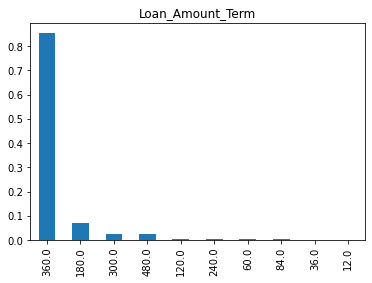

In [24]:
# plot bar chart
data['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

In [25]:
#Bivariate Analysis

In [26]:
#Categorical Independent Variable vs Target Variable

Loan_Status    N    Y
Gender               
Female        31   63
Male         123  286


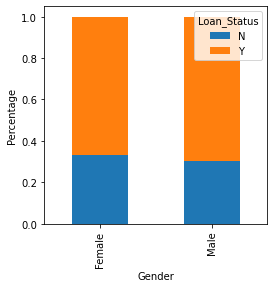

In [27]:
print(pd.crosstab(data['Gender'],data['Loan_Status']))

Gender = pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plot.xlabel('Gender')
p = plot.ylabel('Percentage')

Loan_Status   N    Y
Married             
No           65  115
Yes          93  237


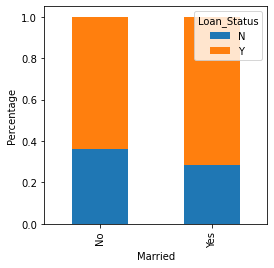

In [28]:
print(pd.crosstab(data['Married'],data['Loan_Status']))

Married = pd.crosstab(data['Married'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plot.xlabel('Married')
p = plot.ylabel('Percentage')

Loan_Status   N    Y
Dependents          
0            90  205
1            32   52
2            18   64
3+           15   25


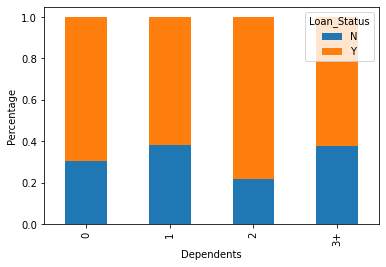

In [29]:
print(pd.crosstab(data['Dependents'],data['Loan_Status']))

Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('Dependents')
p = plot.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      114  289
Not Graduate   44   66


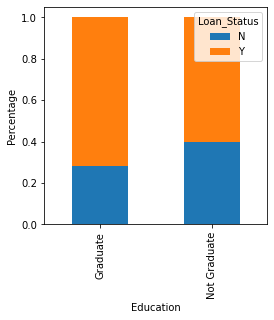

In [30]:
print(pd.crosstab(data['Education'],data['Loan_Status']))

Education=pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plot.xlabel('Education')
p = plot.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             129  290
Yes             21   46


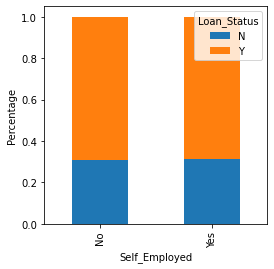

In [31]:
print(pd.crosstab(data['Self_Employed'],data['Loan_Status']))

Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plot.xlabel('Self_Employed')
p = plot.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             66    6
1.0             82  316


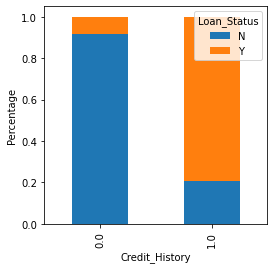

In [32]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plot.xlabel('Credit_History')
p = plot.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          58   87
Semiurban      39  153
Urban          61  115


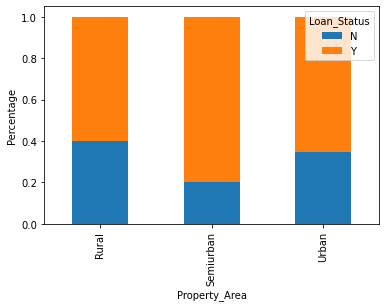

In [33]:
print(pd.crosstab(data['Property_Area'],data['Loan_Status']))

Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('Property_Area')
P = plot.ylabel('Percentage')

In [34]:
#Numerical Independent Variable vs Target Variable

Loan_Status
N    5735.291139
Y    5390.963380
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

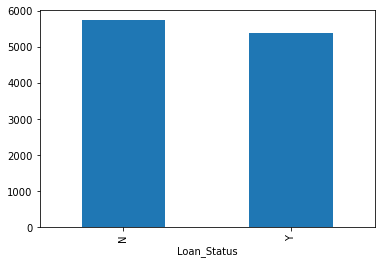

In [35]:
print(data.groupby('Loan_Status')['ApplicantIncome'].mean())

data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [36]:
#make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [37]:
# making bins for applicant income variable
bins = [0,3500,6000,9000,30000]
group = ['Low','Average','High', 'Very high']
data['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [38]:
# view the train set
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Average
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Average
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Low
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,Average
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very high


In [39]:
# making bins for Coapplicant income variable
bins = [0,2000,8000,25000]
group = ['Low','Average','High']
data['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

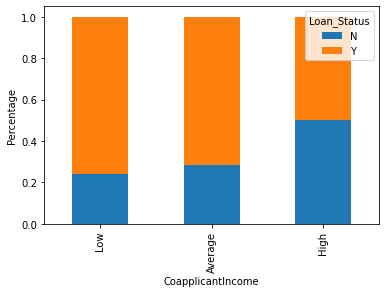

In [40]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('CoapplicantIncome')
P = plot.ylabel('Percentage')

In [41]:
# look at the train set
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Low,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Low,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Average,NaN
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Average,Average
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Low,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,Average,Low
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very high,High


Loan_Status   N    Y
Income_bin          
Low          49  121
Average      40   97
High         16   29
Very high    17   26


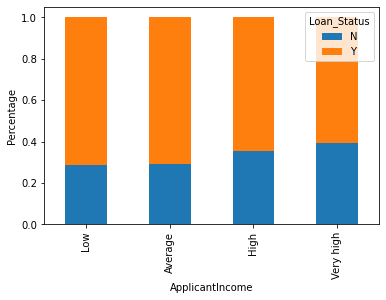

In [42]:
print(pd.crosstab(data['Income_bin'],data['Loan_Status']))

Income_bin = pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('ApplicantIncome')
P = plot.ylabel('Percentage')

In [43]:
# making bins for Coapplicant income variable
bins = [0,2000,8000,30000]
group = ['Low','Average','High']
data['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

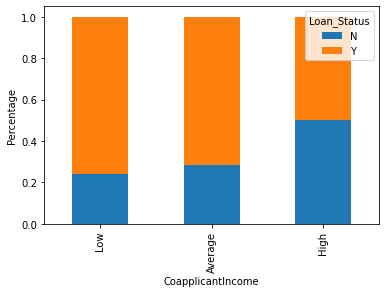

In [44]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('CoapplicantIncome')
P = plot.ylabel('Percentage')

In [45]:
print(len(data[data["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:", len(data[data["CoapplicantIncome"] == 0])/len(data["CoapplicantIncome"])

229


('Percentage of CoapplicantIncome = 0 is:', 0.44639376218323584)

In [46]:
# create a new variable
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [47]:
# making bins for Total Income variable
bins = [0,3500,6000,9000,30000]
group = ['Low','Average','High', 'Very high']
data['Total_Income_bin'] = pd.cut(data['Total_Income'],bins,labels=group)

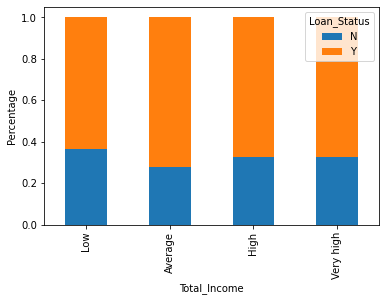

In [48]:
# plot the chart
Total_Income_bin = pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('Total_Income')
P = plot.ylabel('Percentage')

In [49]:
# making bins for LoanAmount variable
bins = [0,200,400,800]
group = ['Low','Average','High']
data['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

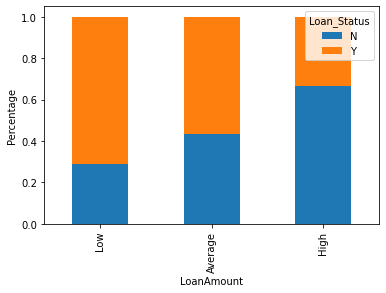

In [50]:
# plot the chart 
LoanAmount_bin = pd.crosstab(data['LoanAmount_bin'],data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('LoanAmount')
P = plot.ylabel('Percentage')

In [51]:
# before dropping
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,Average,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,Low,6091.0,High,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Low,NaN,3000.0,Low,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Low,Average,4941.0,Average,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Average,NaN,6000.0,Average,Low


In [52]:
# drop the new variable of bins
data = data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [53]:
# after dropping
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
#We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also 
#convert the target variable’s categories into 0 and 1 so that we can find its correlation with 
#numerical variables.

In [55]:
# replacing 3+ in Dependents variable with 3 for both train and test set
data['Dependents'].replace('3+', 3, inplace=True)

In [56]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].replace('Y', 1, inplace=True)

In [57]:
# check the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Feature Extraction

It is a process where we identify which factors are most prominent or best suited for training our model and will help us to give accurate outcomes.

In [58]:
#Now lets look at the correlation between all the numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.111976,0.581574,-0.070335,-0.032966,-0.024532
CoapplicantIncome,-0.111976,1.000000,0.226886,0.014241,-0.025144,0.001389
LoanAmount,0.581574,0.226886,1.000000,0.031093,-0.032203,-0.065533
Loan_Amount_Term,-0.070335,0.014241,0.031093,1.000000,0.021670,-0.063412
Credit_History,-0.032966,-0.025144,-0.032203,0.021670,1.000000,0.551057
Loan_Status,-0.024532,0.001389,-0.065533,-0.063412,0.551057,1.000000


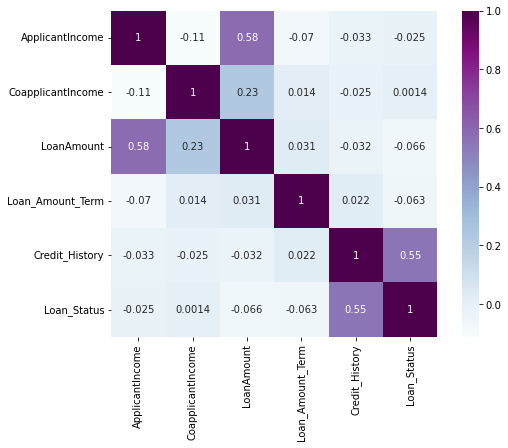

In [59]:
# calculate and visualize correlation matrix
matrix = data.corr()
f, ax = plot.subplots(figsize=(9, 6))
snb.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

In [60]:
#Data Pre-processing

In [61]:
#Missing value and outlier treatment

In [62]:
#Missing value imputation

In [63]:
# check for missing values
data.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
# replace missing values with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [65]:
#Now let’s try to find a way to fill the missing values in Loan_Amount_Term. 
#We will look at the value count of the Loan amount term variable.

In [66]:
data['Loan_Amount_Term'].value_counts()

360.0    426
180.0     35
300.0     13
480.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [67]:
# replace missing value with the mode
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [68]:
# replace missing values with the median value due to outliers
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [69]:
# check whether all the missing values are filled in the Train dataset
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
#Outlier Treatment

Text(0.5, 1.0, 'Training Data')

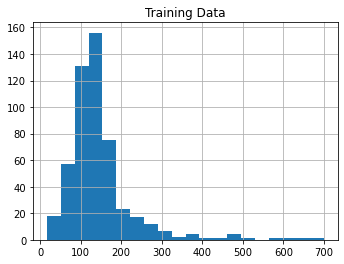

In [71]:
# before log transformation

ax1 = plot.subplot(121)
data['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Training Data")

In [72]:
# Removing skewness in LoanAmount variable by log transformation
data['LoanAmount_log'] = np.log(data['LoanAmount'])

Text(0.5, 1.0, 'Training Data')

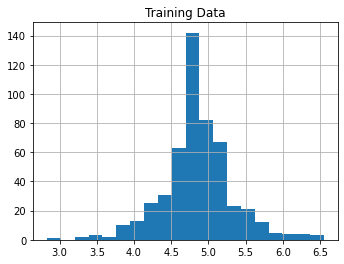

In [73]:
# after log transformation

ax1 = plot.subplot(121)
data['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Training Data")

In [74]:
#Model Development and Evaluation
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,1,4.844187
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [75]:
# drop Loan_ID 
data = data.drop('Loan_ID', axis=1)

In [76]:
# drop "Loan_Status" and assign it to target variable
X = data.drop('Loan_Status', 1)
y = data.Loan_Status

We will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As our model will take only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.
We can use pandas get_dummies function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.

In [77]:
# adding dummies to the dataset
X = pd.get_dummies(X)
data = pd.get_dummies(data)

In [78]:
X.shape, data.shape

((513, 21), (513, 22))

In [79]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,127.0,360.0,1.0,4.844187,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) # 80% training and 20% test

In [81]:
# take a look at the dimension of the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((461, 21), (52, 21), (461,), (52,))

# hjbjh

In [83]:
#X = x_train.iloc[:,:-1].values

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
# imputer = imputer.fit(X.iloc[:, 1:3])
# X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

#plot.scatter(X[:, 0], X[:, 1], c=y_train, cmap='winter')

In [84]:
model = svm.SVC(kernel='linear', C=1.0) # Linear Kernel

In [85]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [104]:
y_pred = model.predict(x_test)

In [99]:
#Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8076923076923077


In [90]:
#Precision = TP / (TP+FP)
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.782608695652174


In [91]:
#Recall = TP / (TP+FN)
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 1.0


[[ 6 10]
 [ 0 36]]


Text(33.0, 0.5, 'True')

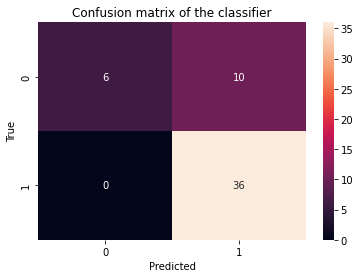

In [92]:
# confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
snb.heatmap(cm, annot=True, fmt="d")
plot.title('Confusion matrix of the classifier')
plot.xlabel('Predicted')
plot.ylabel('True')

In [93]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       0.78      1.00      0.88        36

    accuracy                           0.81        52
   macro avg       0.89      0.69      0.71        52
weighted avg       0.85      0.81      0.78        52



In [94]:
#Model tuning

In [109]:
#K-Fold Cross Validation
#It uses different segments/folds of our data to test the model.
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
 
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("Accuracy from each of 5 folds: ", results)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy from each of 5 folds:  [0.7961165  0.86407767 0.76699029 0.76470588 0.7745098 ]
Mean Accuracy: 79.328%, Standard Deviation: (3.710%)


In [110]:
# Manually tuning C Values
C_values = [.01, .1, 1, 10, 100, 1000]
for value in C_values:
  kfold = KFold(n_splits=5, random_state=0, shuffle=True) 
  model = svm.SVC(kernel='linear', C=value) # Linear Kernel ##### This is the important line
  results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  print("C Value :", value, "Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    

C Value : 0.01 Mean Accuracy: 69.201%, Standard Deviation: (2.715%)
C Value : 0.1 Mean Accuracy: 78.752%, Standard Deviation: (1.808%)
C Value : 1 Mean Accuracy: 78.752%, Standard Deviation: (1.808%)
C Value : 10 Mean Accuracy: 79.727%, Standard Deviation: (1.930%)
C Value : 100 Mean Accuracy: 78.947%, Standard Deviation: (1.910%)
C Value : 1000 Mean Accuracy: 78.947%, Standard Deviation: (1.910%)


In [113]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))